In [1]:
import pandas as pd 
import numpy as np
import datetime

 
data_before = pd.read_csv("before.csv", delimiter=';') 
data_before.head()

,Время начала вызова,Время окончания вызова,Время постановки в очередь,Время переключения на оператора,Время окончания разговора с оператором,"Длительность разговора с оператором, сек"
0,00:00:25,00:00:45,NaN,NaN,NaN,NaN
1,00:01:04,00:06:08,00:02:31,00:03:34,00:05:36,122.0
2,00:01:36,00:03:47,00:02:13,00:02:13,00:03:22,69.0
3,00:05:23,00:06:23,NaN,NaN,NaN,NaN
4,00:05:49,00:09:48,00:06:53,00:06:53,00:09:48,175.0


In [2]:
data_after = pd.read_csv("after.csv", delimiter=';') 
data_after.head()

,Время начала вызова,Время окончания вызова,Время постановки в очередь,Время переключения на оператора,Время окончания разговора с оператором,"Длительность разговора с оператором, сек"
0,00:00:25,00:00:45,NaN,NaN,NaN,NaN
1,00:01:52,00:06:08,0:03:19,00:03:34,00:05:36,122.0
2,00:01:36,00:03:47,0:02:13,00:02:13,00:03:22,69.0
3,00:05:23,00:06:23,NaN,NaN,NaN,NaN
4,00:05:49,00:09:48,0:06:53,00:06:53,00:09:48,175.0


In [3]:
cols = list(data_before.columns)
changed_dic = {}
col_array = []
for col in cols:
    for j in range(0, data_after.shape[0]):
        if data_before[col][j] == data_after[col][j]:
            changed_dic[col]=0
        else:
            changed_dic[col]=1

делали изменения?

In [4]:
changed = []
for j in range(0, data_after.shape[0]):
    evid = 0
    for col in cols:
        if data_before[col][j] == data_after[col][j]:
            evid +=0
        else:
            evid +=1
    if evid > 0 :
        changed.append('1')
    else:
        changed.append('0')

часть суток?

In [5]:
parts_bef = []
parts_aft = []
# night - 1, morning - 2, noon - 3, evening - 4, late evening -5
for j in range(0, data_after.shape[0]):
    if j in (10937, 13190, 29257, 29258, 32356, 34137, 41160, 51856):
        part_bef = '0'
        part_aft = '0'
    else:    
        if int(data_before[cols[0]][j][:2]) < 7:
            part_bef = '1'
        else:
            if int(data_before[cols[0]][j][:2]) < 12:
                part_bef = '2'
            else:
                if int(data_before[cols[0]][j][:2]) < 17:
                    part_bef = '3'
                else:
                    if int(data_before[cols[0]][j][:2]) < 21:
                        part_bef = '4'
                    else:
                        part_bef = '5'


        if int(data_after[cols[0]][j][:2]) < 7:
            part_aft = '1'
        else:
            if int(data_after[cols[0]][j][:2]) < 12:
                part_aft = '2'
            else:
                if int(data_after[cols[0]][j][:2]) < 17:
                    part_aft = '3'
                else:
                    if int(data_after[cols[0]][j][:2]) < 21:
                        part_aft = '4'
                    else:
                        part_aft = '5'
                    
    parts_bef.append(part_bef)
    parts_aft.append(part_aft)

про работу с датами

длительность звонка

In [6]:
real_call_duration = []
reported_call_duration = []
for j in range(0, data_after.shape[0]):
    if j in (10937, 13190, 29257, 29258, 32356, 34137, 41160, 51856):
        dur_real = '0'
        dur_rep = '0'
    else:
        if type(data_before[cols[1]][j])!=str or type(data_before[cols[0]][j])!=str or type(data_after[cols[1]][j])!=str or type(data_after[cols[0]][j])!= str:
            dur_real = '0'
            dur_rep = '0'
        else:
            beg_real = datetime.datetime.strptime(data_before[cols[0]][j], '%H:%M:%S')#.time()
            end_real = datetime.datetime.strptime(data_before[cols[1]][j], '%H:%M:%S')#.time()
            #dur_real = end_real - beg_real
            
            event1 = beg_real #data_before[cols[0]][j]
            event2 = end_real #data_before[cols[1]][j]

            dur_real = abs(event2 - event1).total_seconds()

            beg_rep = datetime.datetime.strptime(data_after[cols[0]][j], '%H:%M:%S')#.time()
            end_rep = datetime.datetime.strptime(data_after[cols[1]][j], '%H:%M:%S')#.time()
            #dur_rep = end_rep - beg_rep
            
            event1 = beg_rep #data_after[cols[0]][j]
            event2 = end_rep #data_after[cols[1]][j]
            
            dur_rep = abs(event2 - event1).total_seconds()
    
    real_call_duration.append(dur_real)
    reported_call_duration.append(dur_rep)   

длительность очереди

In [7]:
real_queue_duration = []
reported_queue_duration = []
for j in range(0, data_after.shape[0]):
    if j in (10937, 13190, 29257, 29258, 32356, 34137, 41160, 51856):
        dur_real = '0'
        dur_rep = '0'
    else:
        if type(data_before[cols[3]][j])!=str or type(data_before[cols[2]][j])!=str or type(data_after[cols[3]][j])!=str or type(data_after[cols[2]][j])!= str:
            dur_real = '0'
            dur_rep = '0'
        else:
            beg_real = datetime.datetime.strptime(data_before[cols[2]][j], '%H:%M:%S')#.time()
            end_real = datetime.datetime.strptime(data_before[cols[3]][j], '%H:%M:%S')#.time()
            #dur_real = end_real - beg_real
            
            event1 = beg_real #data_before[cols[0]][j]
            event2 = end_real #data_before[cols[1]][j]

            dur_real = abs(event2 - event1).total_seconds()

            beg_rep = datetime.datetime.strptime(data_after[cols[2]][j], '%H:%M:%S')#.time()
            end_rep = datetime.datetime.strptime(data_after[cols[3]][j], '%H:%M:%S')#.time()
            #dur_rep = end_rep - beg_rep
            
            event1 = beg_rep #data_after[cols[0]][j]
            event2 = end_rep #data_after[cols[1]][j]
            
            dur_rep = abs(event2 - event1).total_seconds()
    
    real_queue_duration.append(dur_real)
    reported_queue_duration.append(dur_rep)   

длительность разговора с оператором

In [8]:
real_operator_duration = []
reported_operator_duration = []
for j in range(0, data_after.shape[0]):
    if j in (10937, 13190, 29257, 29258, 32356, 34137, 41160, 51856):
        dur_real = '0'
        dur_rep = '0'
    else:
        if type(data_before[cols[3]][j])!=str or type(data_before[cols[4]][j])!=str or type(data_after[cols[3]][j])!=str or type(data_after[cols[4]][j])!= str:
            dur_real = '0'
            dur_rep = '0'
        else:
            beg_real = datetime.datetime.strptime(data_before[cols[3]][j], '%H:%M:%S')#.time()
            end_real = datetime.datetime.strptime(data_before[cols[4]][j], '%H:%M:%S')#.time()
            #dur_real = end_real - beg_real
            
            event1 = beg_real #data_before[cols[0]][j]
            event2 = end_real #data_before[cols[1]][j]

            dur_real = abs(event2 - event1).total_seconds()

            beg_rep = datetime.datetime.strptime(data_after[cols[3]][j], '%H:%M:%S')#.time()
            end_rep = datetime.datetime.strptime(data_after[cols[4]][j], '%H:%M:%S')#.time()
            #dur_rep = end_rep - beg_rep
            
            event1 = beg_rep #data_after[cols[0]][j]
            event2 = end_rep #data_after[cols[1]][j]
            
            dur_rep = abs(event2 - event1).total_seconds()
    
    real_operator_duration.append(dur_real)
    reported_operator_duration.append(dur_rep)   

сумма сошлась?

In [9]:
calc_sum_real = []
calc_sum_rep = []

for i in range(0, len(real_call_duration)):
    sum_real = float(real_call_duration[i]) + float(real_queue_duration[i]) + float(real_operator_duration[i])
    sum_rep = float(reported_call_duration[i]) + float(reported_queue_duration[i]) + float(reported_operator_duration[i])
    calc_sum_real.append(sum_real)
    calc_sum_rep.append(sum_rep)

переводим наны в нули

In [10]:
'''
%%time
for col in cols[2:]:
    for i in range(0, len(data_before[col])):
        if type(data_before[col][i])!=str:
            data_before[col][i] = '0'
'''

"\n%%time\nfor col in cols[2:]:\n    for i in range(0, len(data_before[col])):\n        if type(data_before[col][i])!=str:\n            data_before[col][i] = '0'\n"

In [11]:
'''
%%time            
for col in cols[2:]:
    for i in range(0, len(data_after[col])):
        if type(data_after[col][i])!=str:
            data_after[col][i] = '0'
'''

"\n%%time            \nfor col in cols[2:]:\n    for i in range(0, len(data_after[col])):\n        if type(data_after[col][i])!=str:\n            data_after[col][i] = '0'\n"

## добавляем все в датафреймы

In [12]:
data_before['day_time'] = parts_bef
data_after['day_time'] = part_aft

In [13]:
data_before['call_dur'] = real_call_duration 
data_after['call_dur'] = reported_call_duration

In [14]:
data_before['que_dur'] = real_queue_duration 
data_after['que_dur'] = reported_queue_duration 

In [15]:
data_before['oper_dur'] = real_operator_duration 
data_after['oper_dur'] = reported_operator_duration 

In [16]:
data_before['calc_sum'] = calc_sum_real 
data_after['calc_sum'] = calc_sum_rep 

In [17]:
data_before['changed'] = changed
data_after['changed'] = changed

In [18]:
data_before.tail()

,Время начала вызова,Время окончания вызова,Время постановки в очередь,Время переключения на оператора,Время окончания разговора с оператором,"Длительность разговора с оператором, сек",day_time,call_dur,que_dur,oper_dur,calc_sum,changed
55941,23:53:15,23:59:53,23:53:43,23:53:49,23:59:53,364.0,5,398,6,364,768.0,1
55942,23:56:51,23:57:29,NaN,NaN,NaN,NaN,5,38,0,0,38.0,1
55943,23:57:24,23:58:52,23:58:33,NaN,NaN,NaN,5,88,0,0,88.0,1
55944,23:58:26,00:01:15,23:59:32,00:00:00,00:01:13,73.0,5,86231,86372,73,172676.0,1
55945,23:59:37,00:04:07,00:00:11,00:01:00,00:04:07,187.0,5,86130,49,187,86366.0,1


In [19]:
data_after.tail()

,Время начала вызова,Время окончания вызова,Время постановки в очередь,Время переключения на оператора,Время окончания разговора с оператором,"Длительность разговора с оператором, сек",day_time,call_dur,que_dur,oper_dur,calc_sum,changed
55941,23:53:15,23:59:53,23:53:44,23:53:49,23:59:53,364.0,1,398,5,364,767.0,1
55942,23:56:51,23:57:29,NaN,NaN,NaN,NaN,1,38,0,0,38.0,1
55943,23:57:24,23:58:52,23:58:33,NaN,NaN,NaN,1,88,0,0,88.0,1
55944,23:57:45,00:01:17,23:58:51,00:00:01,00:01:13,73.0,1,86188,86330,72,172590.0,1
55945,00:00:00,00:04:27,0:00:31,00:01:20,00:04:27,187.0,1,267,49,187,503.0,1


- почистить от "-86330"

# классификаторs, здравствуйте

## готовим данные 

In [20]:
data_before['changed'] = data_before['changed'].astype(float)
data_after['changed'] = data_after['changed'].astype(float)

data_before['day_time'] = data_before['day_time'].astype(float)
data_after['day_time'] = data_after['day_time'].astype(float)

data_before['call_dur'] = data_before['call_dur'].astype(float)
data_after['call_dur'] = data_after['call_dur'].astype(float)

data_before['que_dur'] = data_before['que_dur'].astype(float)
data_after['que_dur'] = data_after['que_dur'].astype(float)

data_before['oper_dur'] = data_before['oper_dur'].astype(float)
data_after['oper_dur'] = data_after['oper_dur'].astype(float)

data_before['calc_sum'] = data_before['calc_sum'].astype(float)
data_after['calc_sum'] = data_after['calc_sum'].astype(float)

#вроде конвертнула, а что остальным классификаторам не нравится??

In [21]:
type(data_before['day_time'][0])

numpy.float64

In [22]:
labels_b = data_before['changed']
labels_a = data_after['changed']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_b = data_before[['day_time', 'call_dur', 'que_dur', 'oper_dur', 'calc_sum']]

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(X_b, labels_b, test_size=0.3)

In [25]:
X_a = data_after[['day_time', 'call_dur', 'que_dur', 'oper_dur', 'calc_sum']]

x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_a, labels_a, test_size=0.3)

# knn

### before

In [26]:
from sklearn.neighbors import KNeighborsClassifier


In [27]:
knn_before = KNeighborsClassifier(n_neighbors=15, weights='distance')

In [28]:
x_train_b

,day_time,call_dur,que_dur,oper_dur,calc_sum
23036,2.0,38.0,0.0,0.0,38.0
49365,3.0,177.0,0.0,104.0,281.0
25747,3.0,65.0,0.0,0.0,65.0
11448,2.0,611.0,96.0,472.0,1179.0
25900,3.0,377.0,3.0,302.0,682.0
23014,2.0,39.0,0.0,0.0,39.0
23518,2.0,270.0,1.0,173.0,444.0
41629,2.0,241.0,0.0,204.0,445.0
11162,2.0,468.0,119.0,281.0,868.0
28437,3.0,95.0,0.0,0.0,95.0


In [29]:
y_train_b

23036    1.0
49365    0.0
25747    1.0
11448    1.0
25900    1.0
23014    1.0
23518    1.0
41629    0.0
11162    1.0
28437    1.0
53395    1.0
28193    1.0
31537    1.0
40721    1.0
32115    0.0
9368     1.0
52010    1.0
2024     1.0
20952    1.0
26273    1.0
23529    0.0
41930    1.0
8987     1.0
55184    0.0
28712    1.0
3081     1.0
41664    1.0
40880    0.0
18763    1.0
23511    1.0
        ... 
20276    0.0
48018    1.0
1103     1.0
18211    1.0
10088    1.0
5154     1.0
54480    1.0
24526    1.0
28480    0.0
52849    1.0
15077    0.0
20723    0.0
25365    1.0
38689    0.0
7028     1.0
39649    1.0
37692    1.0
42980    1.0
3530     1.0
48346    0.0
22749    0.0
40490    0.0
30251    1.0
17541    1.0
13015    1.0
51617    0.0
54324    1.0
29399    1.0
49870    0.0
12495    1.0
Name: changed, Length: 39162, dtype: float64

In [324]:
knn_before.fit(x_train_b, y_train_b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [325]:
knn_before.score(x_test_b, y_test_b)

0.797009056244042

In [388]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = y_test_b
>>> y_scores = knn_before.predict(x_test_b)
>>> roc_auc_score(y_true, y_scores)

0.7345651808948208

In [376]:
y_true = y_true.to_list()
y_appr = knn_before.predict(x_test_a)

nevyazka = []
for i in range(0, len(y_true)):
    nevyazka.append(abs(y_true[i] - y_appr[i]))
    
sum = 0
for i in range(0, len(nevyazka)):
    sum +=nevyazka[i]
    
sum

6221.0

In [389]:
confusion_matrix(y_true, y_scores)

array([[ 2623,  1709],
       [ 1698, 10754]])

### after

In [327]:
knn_after = KNeighborsClassifier(n_neighbors=15, weights='distance')

In [328]:
knn_after.fit(x_train_a, y_train_a)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [329]:
knn_after.score(x_test_a, y_test_a)

0.7755004766444232

In [386]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = y_test_a
>>> y_scores = knn_after.predict(x_test_b)
>>> roc_auc_score(y_true, y_scores)

0.5056908431988973

In [374]:
y_true = y_true.to_list()
y_appr = knn_after.predict(x_test_a)

nevyazka = []
for i in range(0, len(y_true)):
    nevyazka.append(abs(y_true[i] - y_appr[i]))
    
sum = 0
for i in range(0, len(nevyazka)):
    sum +=nevyazka[i]
    
sum

3768.0

In [387]:
confusion_matrix(y_true, y_scores)

array([[1363, 3005],
       [3733, 8683]])

# naive bayes

In [331]:
from sklearn.naive_bayes import MultinomialNB

### before

In [332]:
naive_bayes_before = MultinomialNB()
naive_bayes_before.fit(x_train_b, y_train_b)
naive_bayes_before.score(x_test_b, y_test_b)

0.7722235462345091

In [384]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = y_test_b
>>> y_scores = naive_bayes_before.predict(x_test_b)
>>> roc_auc_score(y_true, y_scores)

0.7944064950870252

In [372]:
y_true = y_true.to_list()
y_appr = naive_bayes_before.predict(x_test_a)

nevyazka = []
for i in range(0, len(y_true)):
    nevyazka.append(abs(y_true[i] - y_appr[i]))
    
sum = 0
for i in range(0, len(nevyazka)):
    sum +=nevyazka[i]
    
sum

8209.0

In [385]:
confusion_matrix(y_true, y_scores)

array([[3640,  692],
       [3131, 9321]])

### after

In [334]:
naive_bayes_after = MultinomialNB()
naive_bayes_after.fit(x_train_a, y_train_a)
naive_bayes_after.score(x_test_a, y_test_a)

0.7147283126787417

In [382]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = y_test_a
>>> y_scores = naive_bayes_after.predict(x_test_a)
>>> roc_auc_score(y_true, y_scores)

0.6947739357935878

In [370]:
y_true = y_true.to_list()
y_appr = naive_bayes_after.predict(x_test_a)

nevyazka = []
for i in range(0, len(y_true)):
    nevyazka.append(abs(y_true[i] - y_appr[i]))
    
sum = 0
for i in range(0, len(nevyazka)):
    sum +=nevyazka[i]
    
sum

4788.0

In [383]:
confusion_matrix(y_true, y_scores)

array([[2853, 1515],
       [3273, 9143]])

# svm

### before

In [336]:
from sklearn import svm

In [337]:
svm_before = svm.SVC(gamma=0.001)
svm_before.fit(x_train_b, y_train_b) 
svm_before.score(x_test_b, y_test_b)

0.8048141086749285

In [380]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = y_test_b
>>> y_scores = svm_before.predict(x_test_b)
>>> roc_auc_score(y_true, y_scores)

0.7700070208659424

In [368]:
y_true = y_true.to_list()
y_appr = svm_before.predict(x_test_a)

nevyazka = []
for i in range(0, len(y_true)):
    nevyazka.append(abs(y_true[i] - y_appr[i]))
    
sum = 0
for i in range(0, len(nevyazka)):
    sum +=nevyazka[i]
    
sum

6146.0

In [381]:
confusion_matrix(y_true, y_scores)

array([[ 3024,  1308],
       [ 1968, 10484]])

### after

In [339]:
svm_after = svm.SVC(gamma=0.001)#gamma='scale')
svm_after.fit(x_train_a, y_train_a)
svm_after.score(x_test_a, y_test_a)

0.7923617731172545

In [378]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = y_test_a
>>> y_scores = svm_after.predict(x_test_a)
>>> roc_auc_score(y_true, y_scores)

0.7761838676787132

In [362]:
y_true = y_true.to_list()
y_appr = svm_after.predict(x_test_a)

nevyazka = []
for i in range(0, len(y_true)):
    nevyazka.append(abs(y_true[i] - y_appr[i]))
    
sum = 0
for i in range(0, len(nevyazka)):
    sum +=nevyazka[i]
    
sum

3485.0

In [377]:
>>> from sklearn.metrics import confusion_matrix

In [379]:
confusion_matrix(y_true, y_scores)

array([[ 3243,  1125],
       [ 2360, 10056]])

## ask benford

In [24]:
import benford as bf

In [30]:
np.log(data_after['Длительность разговора с оператором, сек'][5])

5.857933154483459

In [179]:
log_call_dur_before = []
for i in range(0, len(data_before['call_dur'])):
            log_call_dur_before.append(np.log(data_before['call_dur'][i]))

log_call_dur_after = []
for i in range(0, len(data_after['call_dur'])):
            log_call_dur_after.append(np.log(data_after['call_dur'][i]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [180]:
data_before['log_call_dur'] = log_call_dur_before
data_after['log_call_dur'] = log_call_dur_after

In [181]:
log_que_dur_before = []
for i in range(0, len(data_before['que_dur'])):
            log_que_dur_before.append(np.log(data_before['que_dur'][i]))

log_que_dur_after = []
for i in range(0, len(data_after['que_dur'])):
            log_que_dur_after.append(np.log(data_after['que_dur'][i]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [182]:
data_before['log_que_dur'] = log_que_dur_before
data_after['log_que_dur'] = log_que_dur_after

In [183]:
log_oper_dur_before = []
for i in range(0, len(data_before['oper_dur'])):
            log_oper_dur_before.append(np.log(data_before['oper_dur'][i]))

log_oper_dur_after = []
for i in range(0, len(data_after['oper_dur'])):
            log_oper_dur_after.append(np.log(data_after['oper_dur'][i]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [184]:
data_before['log_oper_dur'] = log_oper_dur_before
data_after['log_oper_dur'] = log_oper_dur_after

In [185]:
log_calc_sum_before = []
for i in range(0, len(data_before['calc_sum'])):
            log_calc_sum_before.append(np.log(data_before['calc_sum'][i]))

log_calc_sum_after = []
for i in range(0, len(data_after['calc_sum'])):
            log_calc_sum_after.append(np.log(data_after['calc_sum'][i]))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [186]:
data_before['log_calc_sum'] = log_calc_sum_before
data_after['log_calc_sum'] = log_calc_sum_after

In [187]:
data_before.head()

,Время начала вызова,Время окончания вызова,Время постановки в очередь,Время переключения на оператора,Время окончания разговора с оператором,"Длительность разговора с оператором, сек",day_time,call_dur,que_dur,oper_dur,calc_sum,changed,log_call_dur,log_que_dur,log_oper_dur,log_calc_sum
0,00:00:25,00:00:45,NaN,NaN,NaN,NaN,1.0,20.0,0.0,0.0,20.0,1.0,2.995732,-inf,-inf,2.995732
1,00:01:04,00:06:08,00:02:31,00:03:34,00:05:36,122.0,1.0,304.0,63.0,122.0,489.0,1.0,5.717028,4.143135,4.804021,6.192362
2,00:01:36,00:03:47,00:02:13,00:02:13,00:03:22,69.0,1.0,131.0,0.0,69.0,200.0,1.0,4.875197,-inf,4.234107,5.298317
3,00:05:23,00:06:23,NaN,NaN,NaN,NaN,1.0,60.0,0.0,0.0,60.0,1.0,4.094345,-inf,-inf,4.094345
4,00:05:49,00:09:48,00:06:53,00:06:53,00:09:48,175.0,1.0,239.0,0.0,175.0,414.0,1.0,5.476464,-inf,5.164786,6.025866


In [188]:
data_after.head()

,Время начала вызова,Время окончания вызова,Время постановки в очередь,Время переключения на оператора,Время окончания разговора с оператором,"Длительность разговора с оператором, сек",day_time,call_dur,que_dur,oper_dur,calc_sum,changed,log_call_dur,log_que_dur,log_oper_dur,log_calc_sum
0,00:00:25,00:00:45,NaN,NaN,NaN,NaN,1.0,20.0,0.0,0.0,20.0,1.0,2.995732,-inf,-inf,2.995732
1,00:01:52,00:06:08,0:03:19,00:03:34,00:05:36,122.0,1.0,256.0,15.0,122.0,393.0,1.0,5.545177,2.70805,4.804021,5.973810
2,00:01:36,00:03:47,0:02:13,00:02:13,00:03:22,69.0,1.0,131.0,0.0,69.0,200.0,1.0,4.875197,-inf,4.234107,5.298317
3,00:05:23,00:06:23,NaN,NaN,NaN,NaN,1.0,60.0,0.0,0.0,60.0,1.0,4.094345,-inf,-inf,4.094345
4,00:05:49,00:09:48,0:06:53,00:06:53,00:09:48,175.0,1.0,239.0,0.0,175.0,414.0,1.0,5.476464,-inf,5.164786,6.025866


## benford as is

In [196]:
#col = 'call_dur'
#col = 'log_call_dur'

#col = 'que_dur'
#col = 'log_que_dur'

#col = 'oper_dur'
#col = 'log_oper_dur'

#col = 'calc_sum'
#col = 'log_calc_sum'

col = 'Время начала вызова'
col = 'Длительность разговора с оператором, сек'

менять значения всех перечисленных столбцов, чтобы у них все строго было численное, никаких нанов, никаких бесконечностей, никаких строк других

# First Digits Test


Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 1 after preparation.

The Mean Absolute Deviation is 0.027376012841349467
For the First Digit:
            - 0.0000 to 0.006: Close Conformity
            - 0.006 to 0.012: Acceptable Conformity
            - 0.012 to 0.015: Marginally Acceptable Conformity
            - Above 0.015: Nonconformity


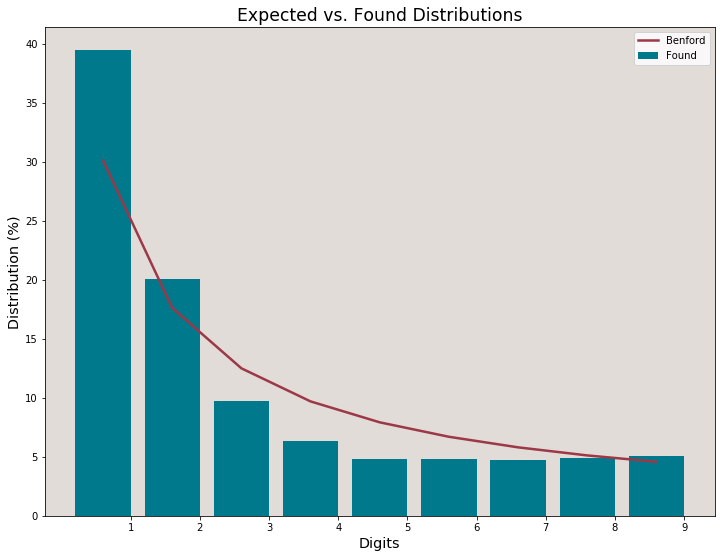

In [197]:
f1d = bf.first_digits(data_before[col], digs=1, decimals=8, MAD=True, show_plot=True)

In [198]:
f1d

,Counts,Found,Expected
First_1_Dig,,,
1,13748,0.394729,0.301030
2,6984,0.200523,0.176091
3,3399,0.097591,0.124939
4,2205,0.063309,0.096910
5,1675,0.048092,0.079181
6,1673,0.048035,0.066947
7,1655,0.047518,0.057992
8,1720,0.049384,0.051153
9,1770,0.050820,0.045757


Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.0027824775394374676
For the First Two Digits:
            - 0.0000 to 0.0012: Close Conformity
            - 0.0012 to 0.0018: Acceptable Conformity
            - 0.0018 to 0.0022: Marginally Acceptable Conformity
            - Above 0.0022: Nonconformity


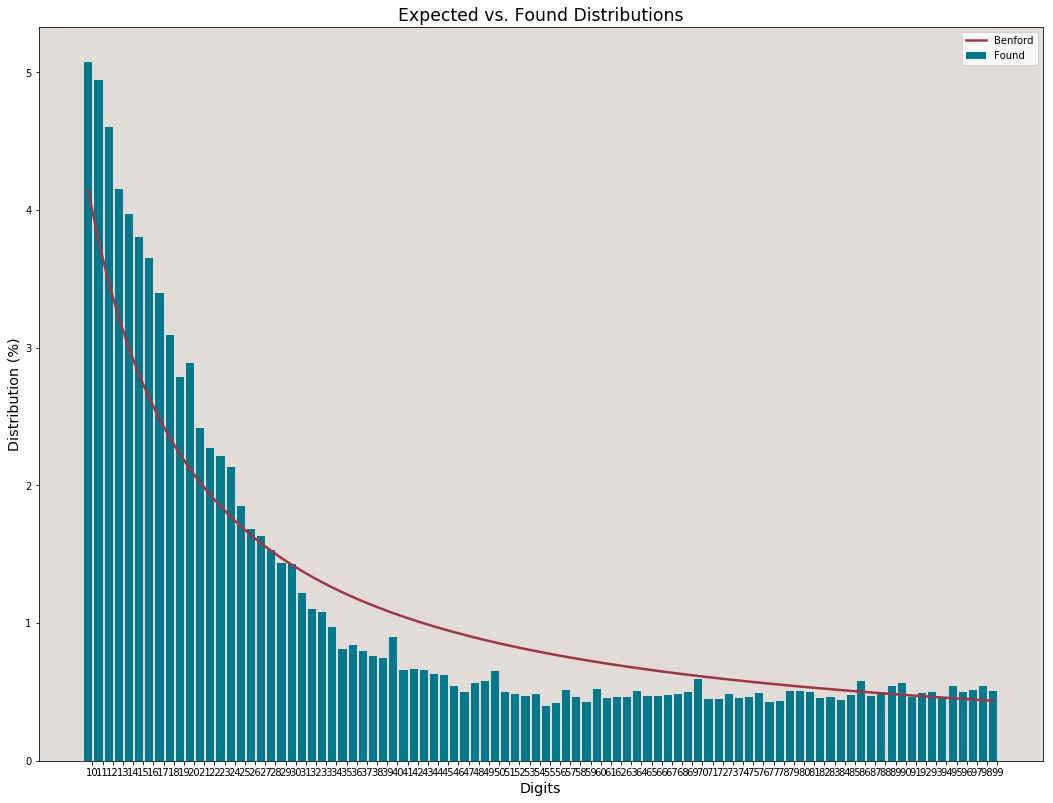

In [199]:
f2d = bf.first_digits(data_before[col], digs=2, decimals=8, MAD=True, show_plot=True) # Note the parameter digs=2!


Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 1 after preparation.

The Mean Absolute Deviation is 0.027376012841349467
For the First Digit:
            - 0.0000 to 0.006: Close Conformity
            - 0.006 to 0.012: Acceptable Conformity
            - 0.012 to 0.015: Marginally Acceptable Conformity
            - Above 0.015: Nonconformity


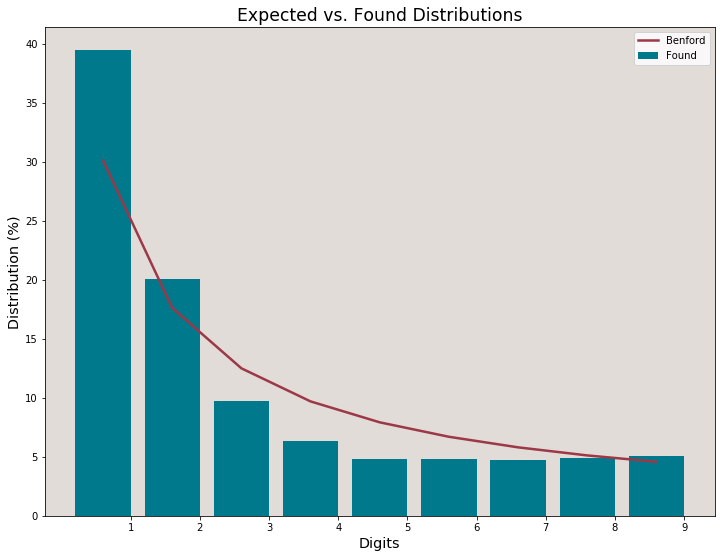

In [206]:
f1d = bf.first_digits(data_after[col], digs=1, decimals=8, MAD=True, show_plot=True)

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.0027824775394374676
For the First Two Digits:
            - 0.0000 to 0.0012: Close Conformity
            - 0.0012 to 0.0018: Acceptable Conformity
            - 0.0018 to 0.0022: Marginally Acceptable Conformity
            - Above 0.0022: Nonconformity


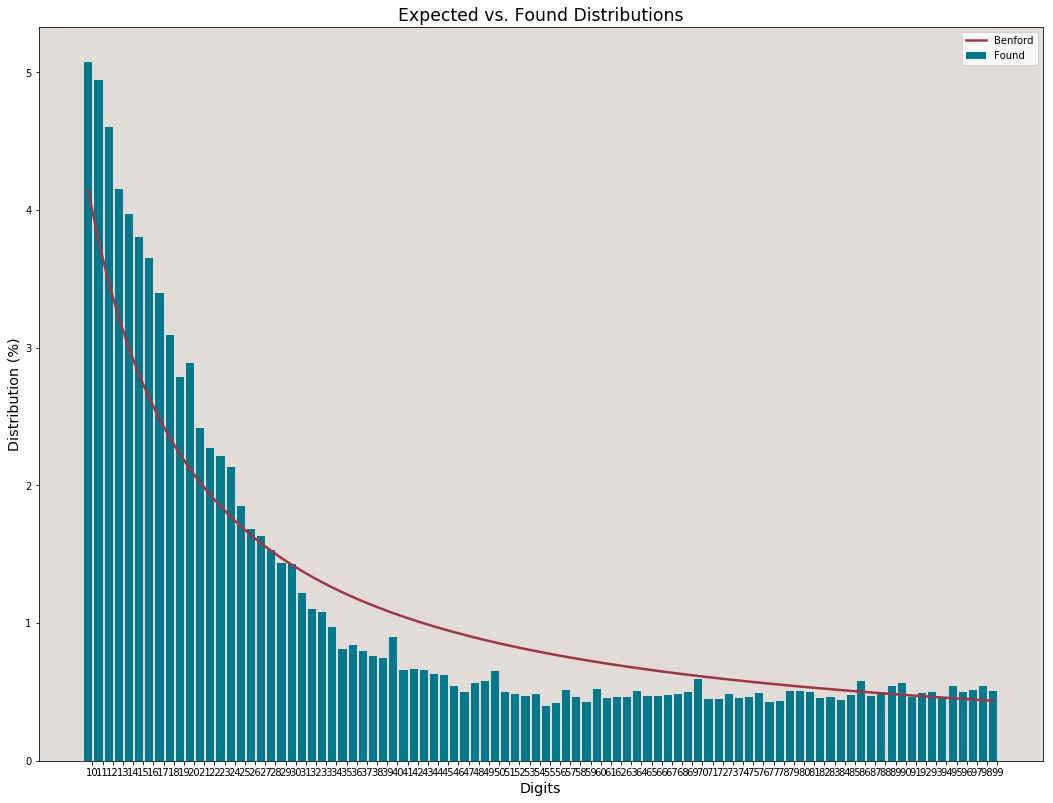

In [207]:
f2d = bf.first_digits(data_after[col], digs=2, decimals=8, MAD=True, show_plot=True) # Note the parameter digs=2!


# Second Digits Test

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

         Expected    Found   Z_score
Sec_Dig                             
0        0.119679  0.13127  6.655951

The Mean Absolute Deviation is 0.0031154481813029334
For the Second Digits:
            - 0.0000 to 0.008: Close Conformity
            - 0.008 to 0.01: Acceptable Conformity
            - 0.01 to 0.012: Marginally Acceptable Conformity
            - Above 0.012: Nonconformity


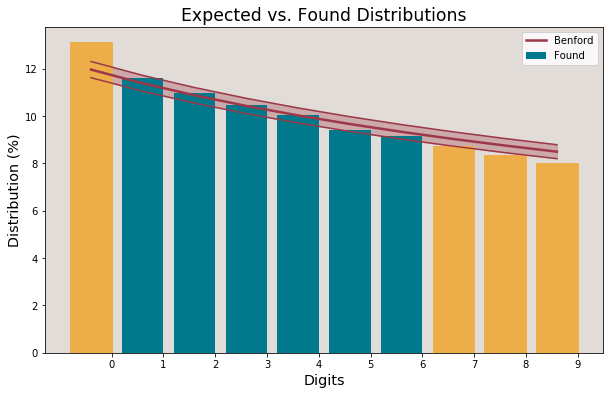

In [200]:
sd = bf.second_digit(data_before[col], decimals=8, confidence=95, MAD=True, show_plot=True)

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

         Expected    Found   Z_score
Sec_Dig                             
0        0.119679  0.13127  6.655951

The Mean Absolute Deviation is 0.0031154481813029334
For the Second Digits:
            - 0.0000 to 0.008: Close Conformity
            - 0.008 to 0.01: Acceptable Conformity
            - 0.01 to 0.012: Marginally Acceptable Conformity
            - Above 0.012: Nonconformity


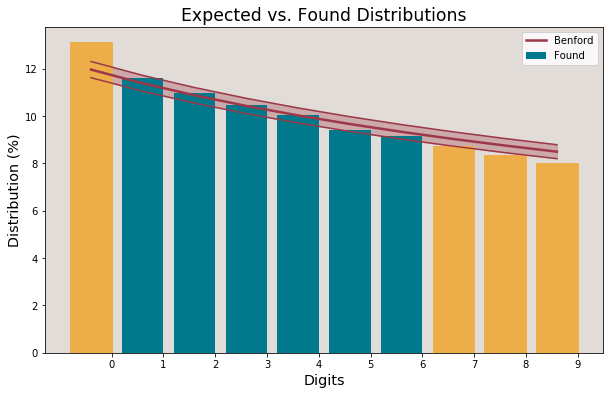

In [208]:
sd = bf.second_digit(data_after[col], decimals=8, confidence=95, MAD=True, show_plot=True)

# Last Digits Test

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected  Found     Z_score
Last_2_Dig                             
0           0.010101    1.0  1847.46935

The Mean Absolute Deviation is 0.01989898989898996


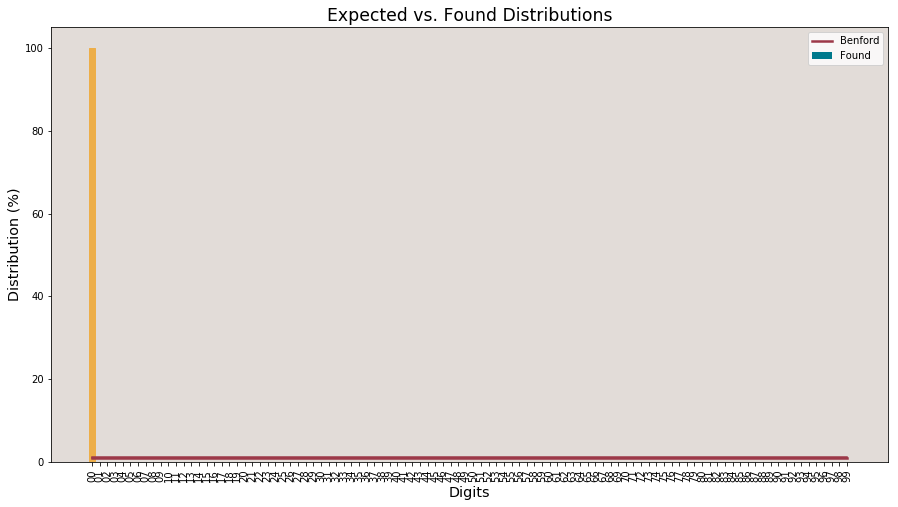

In [201]:
l2d = bf.last_two_digits(data_before[col], decimals=8, confidence=90, MAD=True, show_plot=True)

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected  Found     Z_score
Last_2_Dig                             
0           0.010101    1.0  1847.46935

The Mean Absolute Deviation is 0.01989898989898996


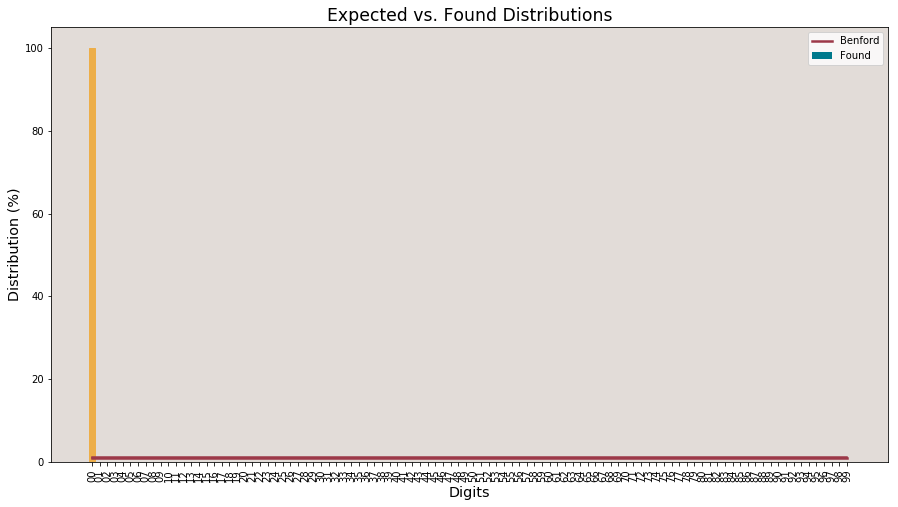

In [209]:
l2d = bf.last_two_digits(data_after[col], decimals=8, confidence=90, MAD=True, show_plot=True)

# оценка соответствия

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_2_Dig                               
16           0.026329  0.036493  11.829955
12           0.034762  0.046025  11.460172
11           0.037789  0.049470  11.418982
15           0.028029  0.038014  11.274321
17           0.024824  0.033966  10.948956
14           0.029963  0.039737  10.683319
20           0.021189  0.028884   9.952730
13           0.032185  0.041517   9.853180
18           0.023481  0.030894   9.118124
10           0.041393  0.050762   8.764839
19           0.022276  0.027850   7.030462
21           0.020203  0.024175   5.249440
23           0.018483  0.022165   5.081847
24           0.017729  0.021304   5.035968
22           0.019305  0.022711   4.599939
98           0.004409  0.005427   2.825344
95           0.004548  0.005398   2.31835

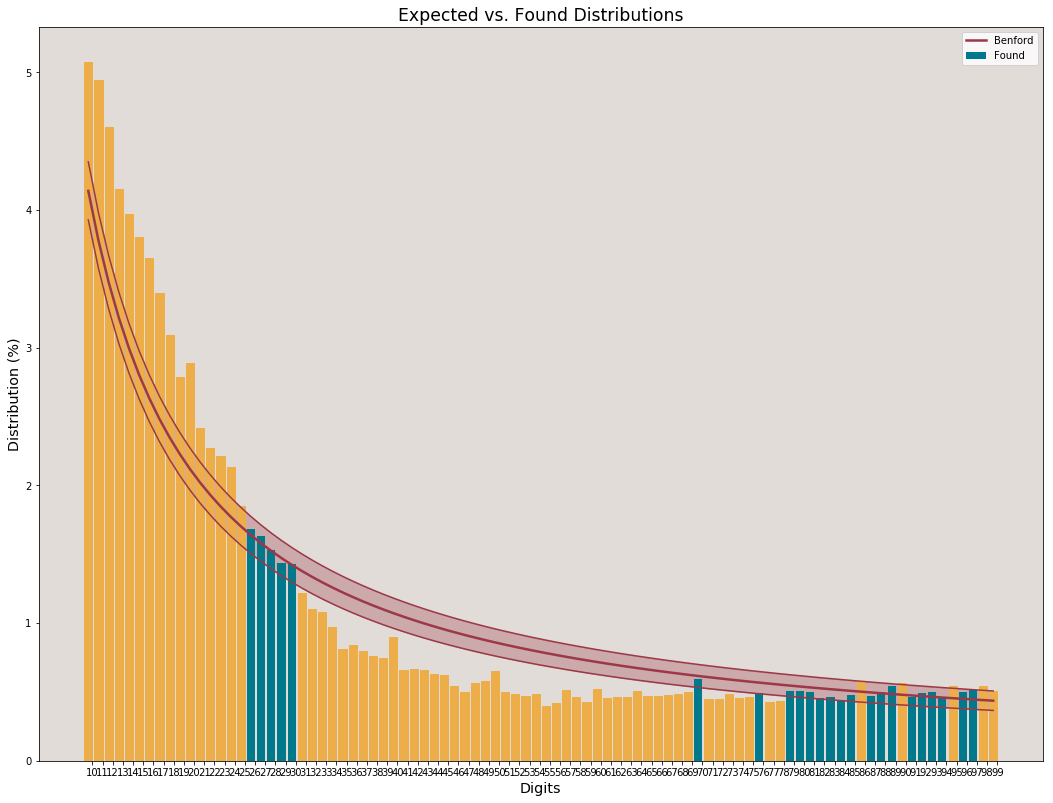

In [202]:
f2d = bf.first_digits(data_before[col], digs=2, decimals=8, confidence=95)

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_3_Dig                               
900          0.000482  0.005340  41.172359
860          0.000505  0.005455  41.016001
950          0.000457  0.005139  40.765837
980          0.000443  0.005053  40.763904
990          0.000438  0.004938  39.987211
970          0.000447  0.004910  39.248534
960          0.000452  0.004824  38.248849
890          0.000488  0.004996  37.985108
930          0.000467  0.004709  36.528767
920          0.000472  0.004651  35.794974
700          0.000620  0.005197  34.207276
940          0.000462  0.004307  33.275780
800          0.000543  0.004709  33.274910
880          0.000493  0.004450  33.139528
850          0.000511  0.004508  32.901006
870          0.000499  0.004422  32.663589
910          0.000477  0.004249  32.1201

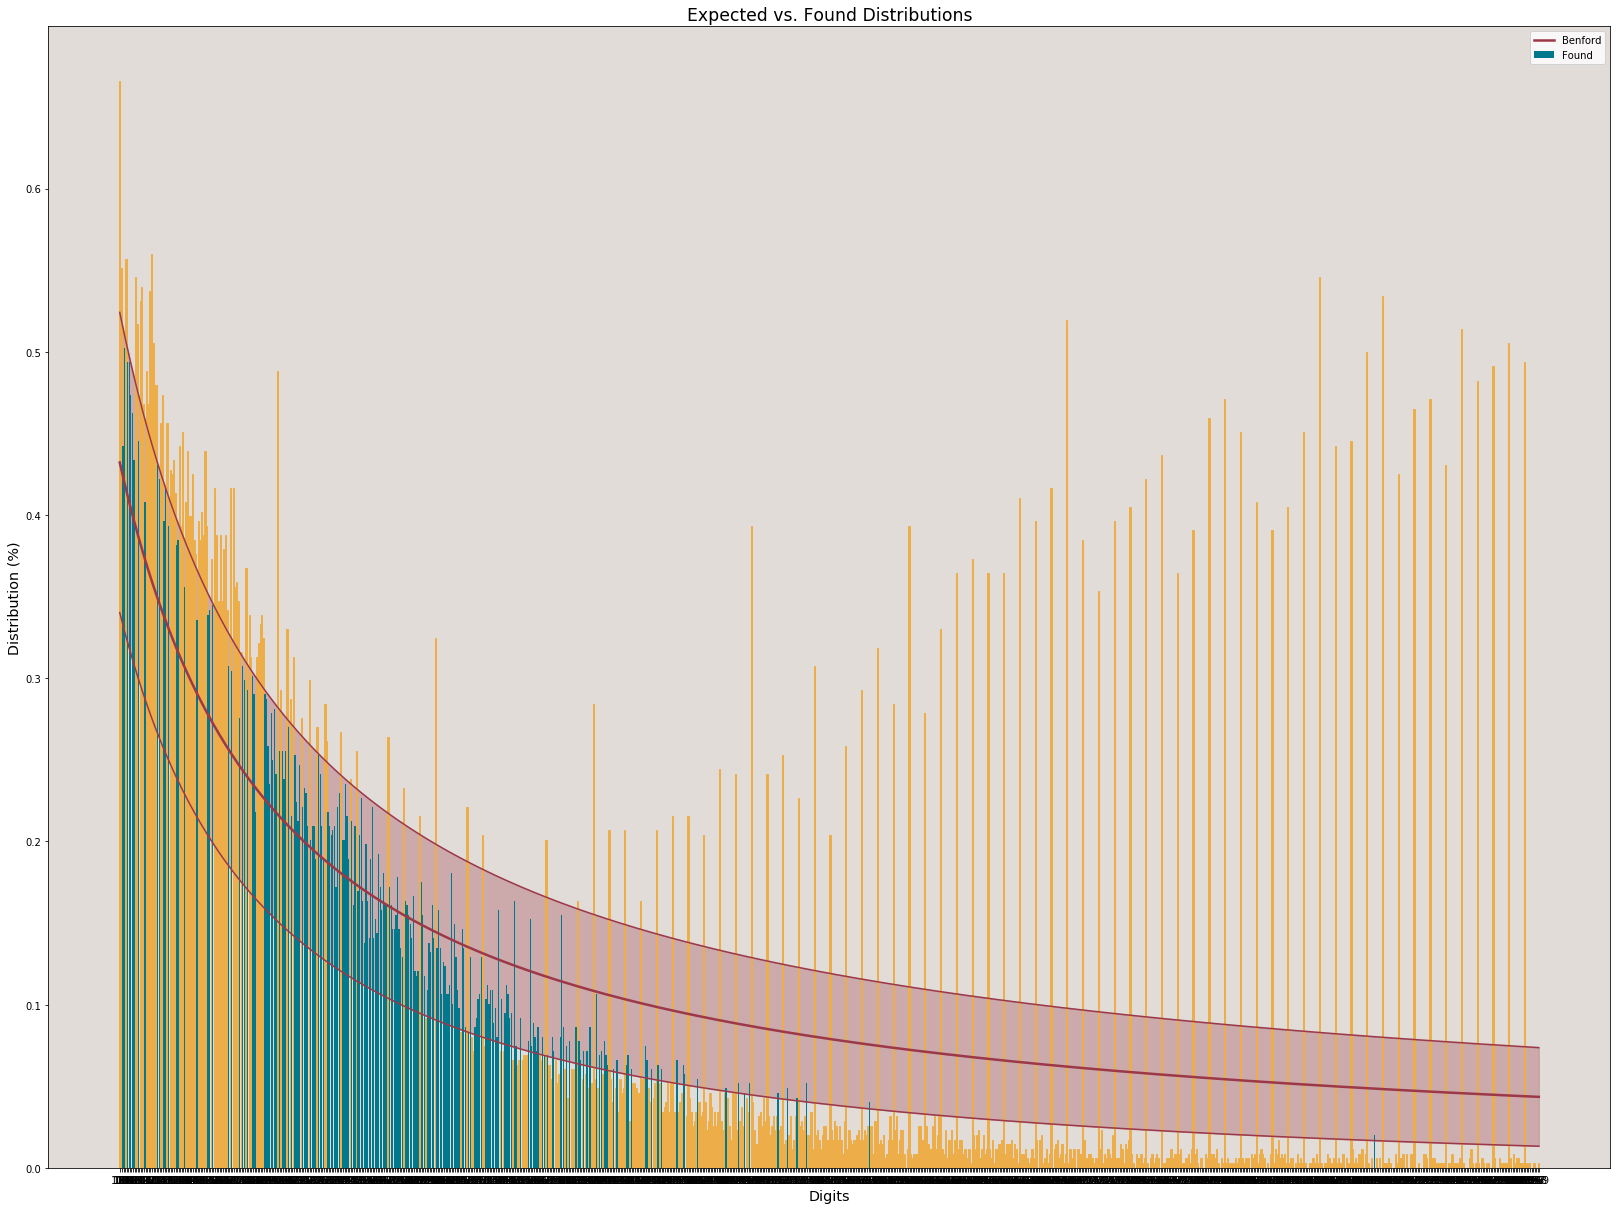

In [203]:
f3d = bf.first_digits(data_before[col], digs=3, decimals=8, confidence=99)


Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_2_Dig                               
16           0.026329  0.036493  11.829955
12           0.034762  0.046025  11.460172
11           0.037789  0.049470  11.418982
15           0.028029  0.038014  11.274321
17           0.024824  0.033966  10.948956
14           0.029963  0.039737  10.683319
20           0.021189  0.028884   9.952730
13           0.032185  0.041517   9.853180
18           0.023481  0.030894   9.118124
10           0.041393  0.050762   8.764839
19           0.022276  0.027850   7.030462
21           0.020203  0.024175   5.249440
23           0.018483  0.022165   5.081847
24           0.017729  0.021304   5.035968
22           0.019305  0.022711   4.599939
98           0.004409  0.005427   2.825344
95           0.004548  0.005398   2.31835

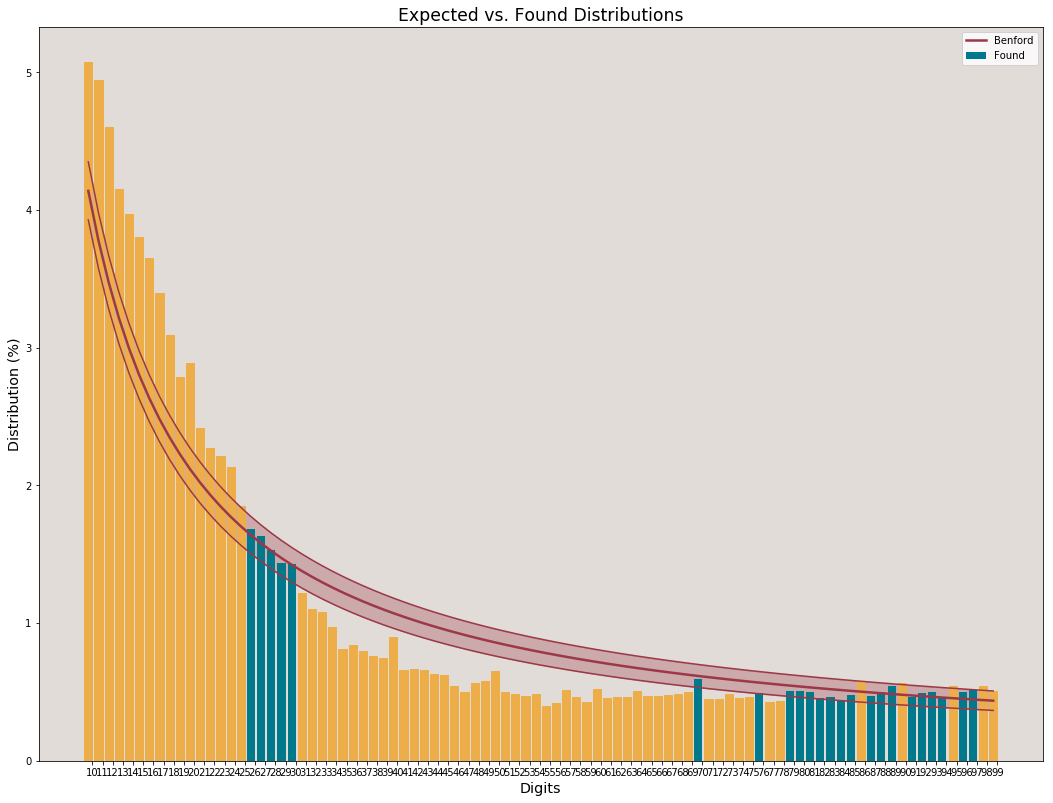

In [210]:
f2d = bf.first_digits(data_after[col], digs=2, decimals=8, confidence=95)

Initialized sequence with 34829 registries.

Test performed on 34829 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_3_Dig                               
900          0.000482  0.005340  41.172359
860          0.000505  0.005455  41.016001
950          0.000457  0.005139  40.765837
980          0.000443  0.005053  40.763904
990          0.000438  0.004938  39.987211
970          0.000447  0.004910  39.248534
960          0.000452  0.004824  38.248849
890          0.000488  0.004996  37.985108
930          0.000467  0.004709  36.528767
920          0.000472  0.004651  35.794974
700          0.000620  0.005197  34.207276
940          0.000462  0.004307  33.275780
800          0.000543  0.004709  33.274910
880          0.000493  0.004450  33.139528
850          0.000511  0.004508  32.901006
870          0.000499  0.004422  32.663589
910          0.000477  0.004249  32.1201

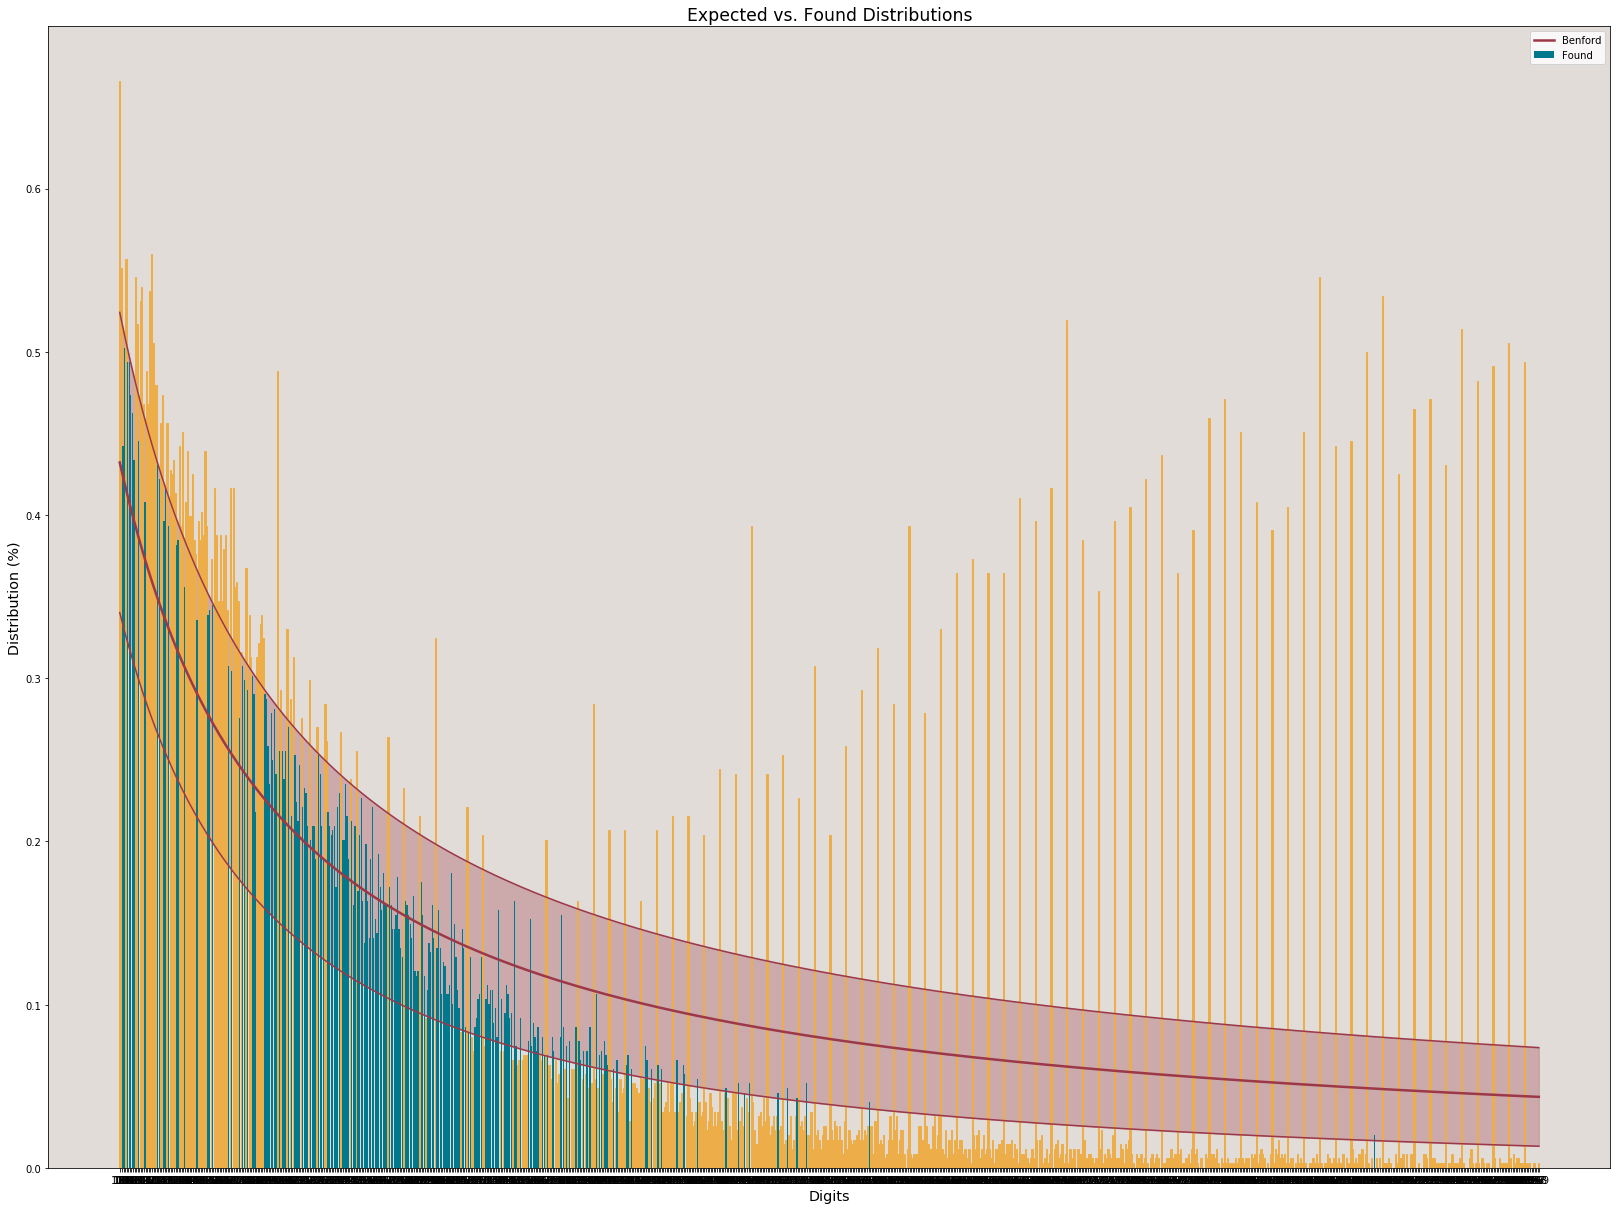

In [211]:
f3d = bf.first_digits(data_after[col], digs=3, decimals=8, confidence=99)


# Мантиссы

The Mantissas MEAN is 0.44015691924056266. 		Ref: 0.5.
The Mantissas VARIANCE is 0.0870282105701442. 	Ref: 0.083333.
The Mantissas SKEWNESS is 0.36892106508798006. 	Ref: 0.
The Mantissas KURTOSIS is -1.0955580195115586. 	Ref: -1.2.


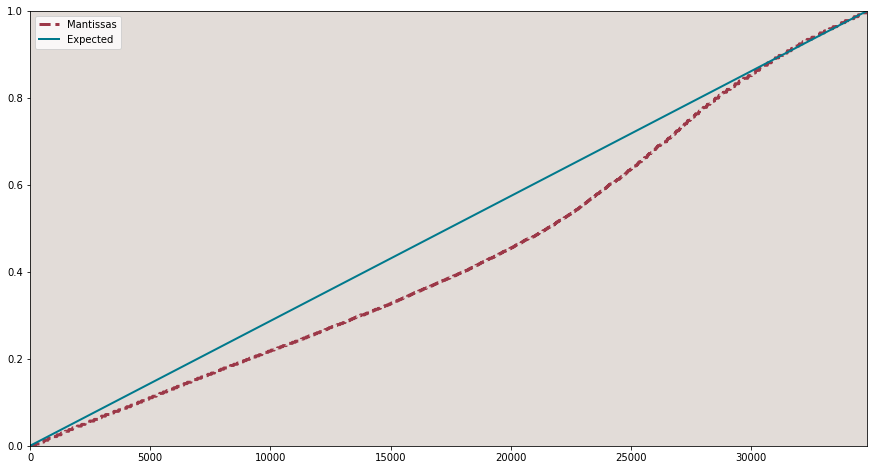

In [204]:
mant = bf.mantissas(data_before[col], inform=True, show_plot=True)


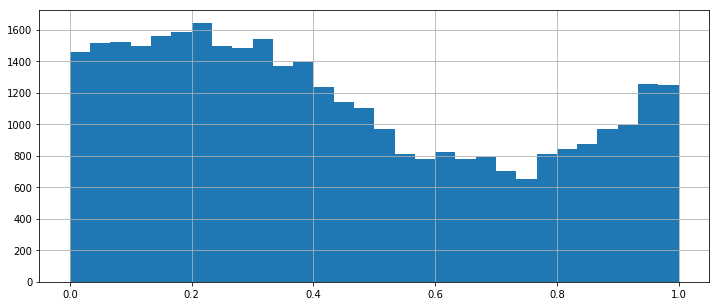

In [205]:
mant.hist(bins=30, figsize=(12,5))


The Mantissas MEAN is 0.44015691924056266. 		Ref: 0.5.
The Mantissas VARIANCE is 0.0870282105701442. 	Ref: 0.083333.
The Mantissas SKEWNESS is 0.36892106508798006. 	Ref: 0.
The Mantissas KURTOSIS is -1.0955580195115586. 	Ref: -1.2.


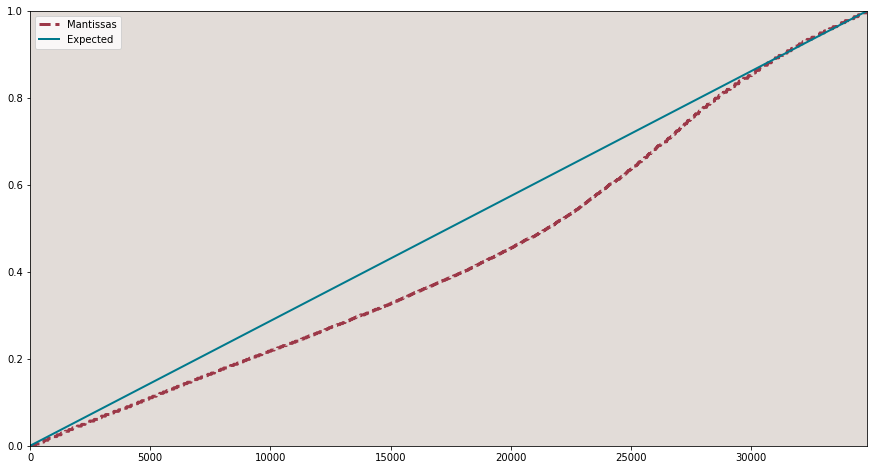

In [212]:
mant = bf.mantissas(data_after[col], inform=True, show_plot=True)


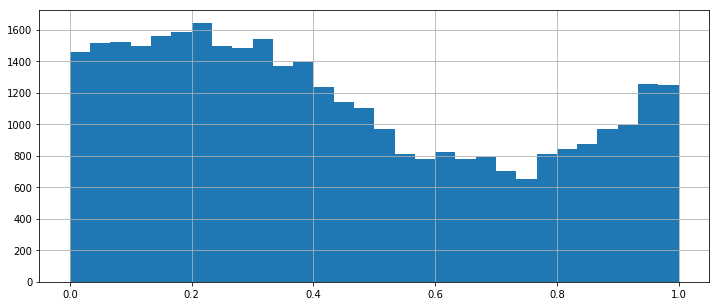

In [213]:
mant.hist(bins=30, figsize=(12,5))
